## 0. Model Description

In [4]:
from IPython.display import display, Image

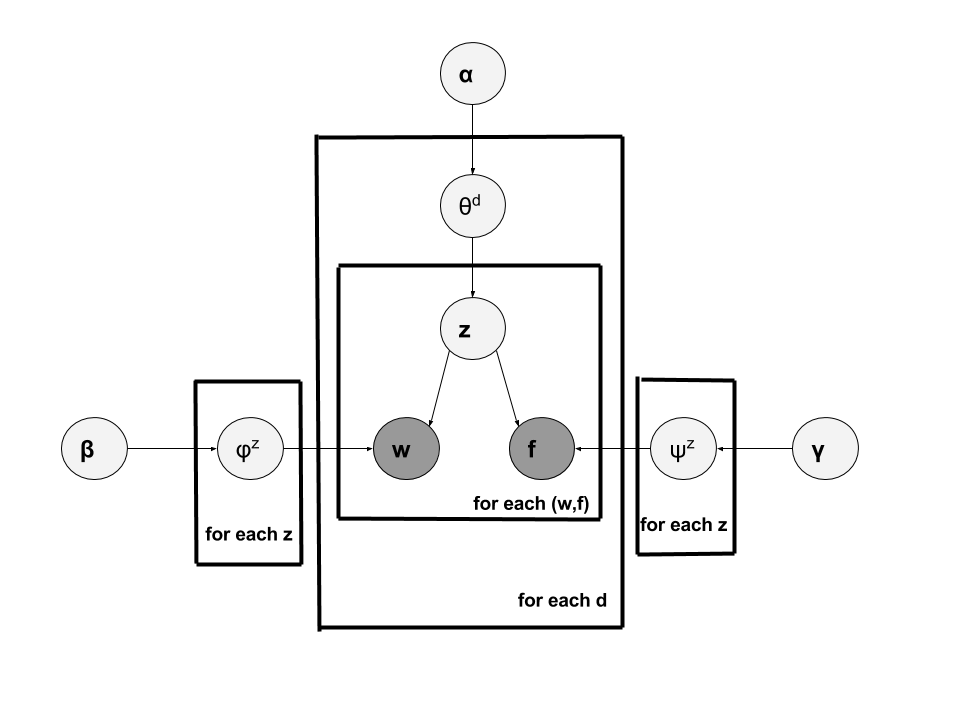

In [8]:
display(Image(filename='/Users/jacobsw/Desktop/UNIV/FALL_2016/LIN389C_RSCH_COMPLING/BAYESIAN/CODE_DRAFTS/FIGS/pgm_roller_andrews.png',width='50%'))

**Pr(word i assigned topic j | rest of the assignment except for word i)**

$\begin{align}P(z_i=j\mid \mathbf{z}_{-1},(w_i,f_i),d_i,\cdot) &= P(w_i\mid z_j)\cdot P(f_i\mid z_j)\cdot P(z_j\mid d)\\ &= \frac{1}{Z}\cdot\frac{C_{w_i,j}^{WT}+\beta}{\sum_{w=1}^WC_{w,j}^{WT}+W\beta}\cdot\frac{C_{f_i,j}^{FT}+\gamma}{\sum_{f=1}^FC_{f,j}^{FT}+F\gamma}\cdot\frac{C_{d_i,j}^{DT}+\alpha}{\sum_{t=1}^TC_{d_i,t}^{WT}+T\alpha}\end{align}$

$\quad\quad\quad\quad\quad\quad\quad\quad\text{where } Z = \sum_j \frac{C_{w_i,j}^{WT}+\beta}{\sum_{w=1}^WC_{w,j}^{WT}+W\beta}\cdot\frac{C_{f_i,j}^{FT}+\gamma}{\sum_{f=1}^FC_{f,j}^{FT}+F\gamma}\cdot\frac{C_{d_i,j}^{DT}+\alpha}{\sum_{t=1}^TC_{d_i,t}^{DT}+T\alpha}$

** Pr(topic j | document d); Pr(word i | topic j); Pr(feature i | topic j) **

$\theta_j^d = \frac{C_{d,j}^{DT}+\alpha}{\sum_{k=1}^TC_{d,k}^{DT}+T\alpha}$; $\quad\phi_i^j = \frac{C_{i,j}^{WT}+\beta}{\sum_{k=1}^WC_{k,j}^{WT}+W\beta}$; $\quad\psi_i^j = \frac{C_{i,j}^{FT}+\gamma}{\sum_{k=1}^FC_{k,j}^{FT}+F\gamma}$

## I. Modeling on Toy Example

### A. Fake Norms

In [254]:
import numpy as np

In [255]:
norms = ['cat','dog','pig','car','bike','train']
props = ['an_animal','purrs','has_4_legs','barks','is_cute',
         'used_for_transportation','honks','has_wheels','is_cool','is_big']
norm2prop = {'cat':['an_animal','purrs','has_4_legs'],
             'dog':['an_animal','barks','has_4_legs'],
             'pig':['an_animal','is_cute','has_4_legs'],
             'car':['used_for_transportation','honks','has_wheels'],
             'bike':['used_for_transportation','is_cool','has_wheels'],
             'train':['used_for_transportation','is_big','has_wheels']}
norm2propprob = {'cat':np.asarray([.33,.33,.33]),
                 'dog':np.asarray([.33,.33,.33]),
                 'pig':np.asarray([.33,.33,.33]),
                 'car':np.asarray([.33,.33,.33]),
                 'bike':np.asarray([.33,.33,.33]),
                 'train':np.asarray([.33,.33,.33])}

### B. Generate Fake Docs

In [256]:
import random

In [257]:
vocab1 = ['cat','dog','pig']
vocab2 = ['car','bike','train']

In [258]:
def sample_prop(norm, norm2prop, norm2propprob):
    return norm2prop[norm][np.argmax(np.random.multinomial(1, pvals=norm2propprob[norm]))]

In [276]:
def generate_docs(vocabs, topics, norm2prop, norm2propprob, freq=10):
    word_docs, prop_docs = [], []
    for vocab in vocabs:
        word_doc, prop_doc = [], []
        for word in vocab:
            for i in range(freq):
                topic = random.choice(topics)
                word_doc.append((word,topic))
                prop_doc.append((sample_prop(word, norm2prop, norm2propprob),topic))
        word_docs.append(word_doc)
        prop_docs.append(prop_doc)
    return word_docs, prop_docs  

In [277]:
word_docs, prop_docs = generate_docs([vocab1,vocab2],[0,1],norm2prop,norm2propprob)

In [278]:
for word_doc in word_docs:
    print word_doc; print

[('cat', 1), ('cat', 0), ('cat', 0), ('cat', 1), ('cat', 1), ('cat', 1), ('cat', 1), ('cat', 1), ('cat', 0), ('cat', 1), ('dog', 0), ('dog', 1), ('dog', 1), ('dog', 0), ('dog', 1), ('dog', 0), ('dog', 1), ('dog', 1), ('dog', 0), ('dog', 0), ('pig', 0), ('pig', 0), ('pig', 1), ('pig', 1), ('pig', 0), ('pig', 1), ('pig', 1), ('pig', 0), ('pig', 0), ('pig', 1)]

[('car', 0), ('car', 0), ('car', 1), ('car', 1), ('car', 0), ('car', 1), ('car', 0), ('car', 1), ('car', 1), ('car', 0), ('bike', 0), ('bike', 1), ('bike', 0), ('bike', 1), ('bike', 1), ('bike', 1), ('bike', 1), ('bike', 0), ('bike', 0), ('bike', 0), ('train', 0), ('train', 1), ('train', 0), ('train', 1), ('train', 1), ('train', 0), ('train', 0), ('train', 1), ('train', 0), ('train', 1)]



In [279]:
for prop_doc in prop_docs:
    print prop_doc; print

[('purrs', 1), ('has_4_legs', 0), ('an_animal', 0), ('an_animal', 1), ('has_4_legs', 1), ('has_4_legs', 1), ('has_4_legs', 1), ('an_animal', 1), ('has_4_legs', 0), ('has_4_legs', 1), ('an_animal', 0), ('an_animal', 1), ('an_animal', 1), ('has_4_legs', 0), ('barks', 1), ('barks', 0), ('has_4_legs', 1), ('has_4_legs', 1), ('barks', 0), ('has_4_legs', 0), ('has_4_legs', 0), ('has_4_legs', 0), ('is_cute', 1), ('an_animal', 1), ('has_4_legs', 0), ('has_4_legs', 1), ('has_4_legs', 1), ('is_cute', 0), ('is_cute', 0), ('an_animal', 1)]

[('used_for_transportation', 0), ('used_for_transportation', 0), ('honks', 1), ('honks', 1), ('has_wheels', 0), ('used_for_transportation', 1), ('honks', 0), ('honks', 1), ('has_wheels', 1), ('used_for_transportation', 0), ('used_for_transportation', 0), ('has_wheels', 1), ('used_for_transportation', 0), ('is_cool', 1), ('has_wheels', 1), ('used_for_transportation', 1), ('has_wheels', 1), ('has_wheels', 0), ('has_wheels', 0), ('used_for_transportation', 0), ('i

### C. Model Building

In [280]:
import pandas as pd

In [281]:
from __future__ import division
from operator import add
from collections import Counter

In [282]:
alpha, beta, gamma = 50/2, .001, .001

In [283]:
words, features = norms, props
w2i = {w:i for i,w in enumerate(words)}
f2i = {f:i for i,f in enumerate(features)}
topics = [0,1]
W, F, D, T = len(words), len(features), len(word_docs), len(topics)

In [284]:
def get_counts(word_docs,prop_docs):
    C_WT, C_FT, C_DT = np.zeros((W,T)), np.zeros((F,T)), np.zeros((D,T))
    wt_counts = reduce(add,[Counter(word_doc) for word_doc in word_docs])
    ft_counts = reduce(add,[Counter(prop_doc) for prop_doc in prop_docs])
    for (w,t_w),wt_count in wt_counts.iteritems(): C_WT[w2i[w]][t_w] = wt_count 
    for (f,t_f),ft_count in ft_counts.iteritems(): C_FT[f2i[f]][t_f] = ft_count
    for i,doc in enumerate(word_docs): # word,feature pairs have the same topic assignments.
        dt_counts = Counter([t for w,t in doc])
        for j in range(T):
            C_DT[i][j] = dt_counts[j]
    return C_WT, C_FT, C_DT

In [285]:
C_WT, C_FT, C_DT = get_counts(word_docs,prop_docs)

In [286]:
print pd.DataFrame(C_WT,index=words); print
print pd.DataFrame(C_FT,index=features); print
print pd.DataFrame(C_DT)

         0    1
cat    3.0  7.0
dog    5.0  5.0
pig    5.0  5.0
car    5.0  5.0
bike   5.0  5.0
train  5.0  5.0

                           0    1
an_animal                2.0  6.0
purrs                    0.0  1.0
has_4_legs               7.0  8.0
barks                    2.0  1.0
is_cute                  2.0  1.0
used_for_transportation  7.0  5.0
honks                    1.0  3.0
has_wheels               4.0  5.0
is_cool                  0.0  1.0
is_big                   3.0  1.0

      0     1
0  13.0  17.0
1  15.0  15.0


In [270]:
print C_WT.sum(), C_FT.sum(), C_DT.sum() # confirmation

60.0 60.0 60.0


In [271]:
def sample_topic(w_i,f_i,d): # w_i,f_i: indices of word-feature pair at ith pos in d.
    # compute normalizing constant
    Z = sum( ((C_WT[w_i][k]+beta) / (sum(C_WT[w][k] for w in xrange(W))+W*beta)) * \
             ((C_FT[f_i][k]+gamma) / (sum(C_FT[f][k] for f in xrange(F))+F*gamma)) * \
             ((C_DT[d][k]+alpha) / (sum(C_DT[d][t] for t in xrange(T))+T*alpha)) 
            for k in xrange(T))  
    # compute numerator (adapted from SG04:8,(3))
    P = [( ((C_WT[w_i][j]+beta) / (sum(C_WT[w][j] for w in xrange(W))+W*beta)) * \
           ((C_FT[f_i][j]+gamma) / (sum(C_FT[f][j] for f in xrange(F))+F*gamma)) * \
           ((C_DT[d][j]+alpha) / (sum(C_DT[d][t] for t in xrange(T))+T*alpha)) ) / Z
          for j in xrange(T)]
    return np.random.choice(np.array(topics),p=np.array(P))

In [272]:
def gibbs(n_iters=1000, verbose_freq=100):
    for e in range(n_iters):
        if e!=0 and e%verbose_freq==0: print "@ %dth iteration" % e
        for d,(word_doc,prop_doc) in enumerate(zip(word_docs,prop_docs)):
            for (w,t),(f,_) in zip(word_doc,prop_doc): # a (w,f) pair have the same topic.
                if C_WT[w2i[w]][t]==0 or C_FT[f2i[f]][t]==0: continue
                C_WT[w2i[w]][t] -= 1
                C_FT[f2i[f]][t] -= 1
                C_DT[d][t] -= 1
                new_t = sample_topic(w2i[w],f2i[f],d)
                C_WT[w2i[w]][new_t] += 1
                C_FT[f2i[f]][new_t] += 1
                C_DT[d][new_t] += 1                

In [273]:
%%time
gibbs()

@ 100th iteration
@ 200th iteration
@ 300th iteration
@ 400th iteration
@ 500th iteration
@ 600th iteration
@ 700th iteration
@ 800th iteration
@ 900th iteration
CPU times: user 2.75 s, sys: 188 ms, total: 2.94 s
Wall time: 2.83 s


In [274]:
print pd.DataFrame(C_WT,index=words); print
print pd.DataFrame(C_FT,index=features); print
print pd.DataFrame(C_DT)

          0     1
cat     0.0  10.0
dog     3.0   7.0
pig     0.0  10.0
car    10.0   0.0
bike   10.0   0.0
train  10.0   0.0

                            0     1
an_animal                 0.0  12.0
purrs                     0.0   3.0
has_4_legs                0.0  10.0
barks                     3.0   0.0
is_cute                   0.0   2.0
used_for_transportation  10.0   0.0
honks                     4.0   0.0
has_wheels                6.0   0.0
is_cool                   4.0   0.0
is_big                    6.0   0.0

      0     1
0   3.0  27.0
1  30.0   0.0
